# 1- Get the Data


In [40]:
import numpy as np
import pandas as pd

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [41]:
diamonds = pd.read_csv(r"C:\Users\Stand By\OneDrive\Desktop\bushra\ShAI\diamonds.csv")

In [42]:
diamonds.shape

(53940, 11)

# 2- Discover and visualize the data


## A- Data discovery

In [43]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
import matplotlib.pyplot as plt # plot
import seaborn as sns #plot

In [45]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [46]:
diamonds["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [47]:
diamonds["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [48]:
diamonds.drop("Unnamed: 0", axis = 1,inplace = True)

In [49]:
diamonds.shape

(53940, 10)

In [50]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [51]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [52]:
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
diamonds.shape

(53920, 10)

In [53]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [54]:
diamonds=diamonds.drop_duplicates()
print('Shape After deleting duplicate values:', diamonds.shape)

Shape After deleting duplicate values: (53775, 10)


<AxesSubplot:>

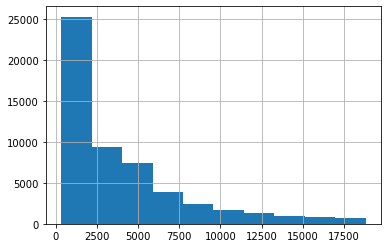

In [55]:
diamonds['price'].hist()

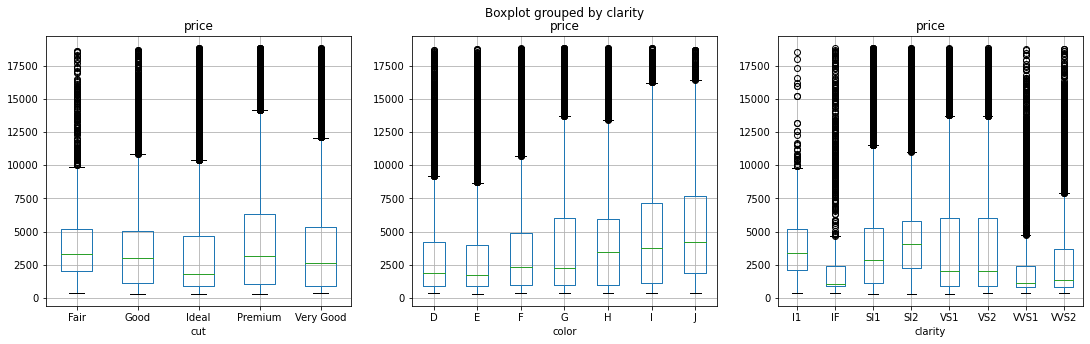

In [59]:
CategoricalColsList=['cut', 'color', 'clarity']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    diamonds.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

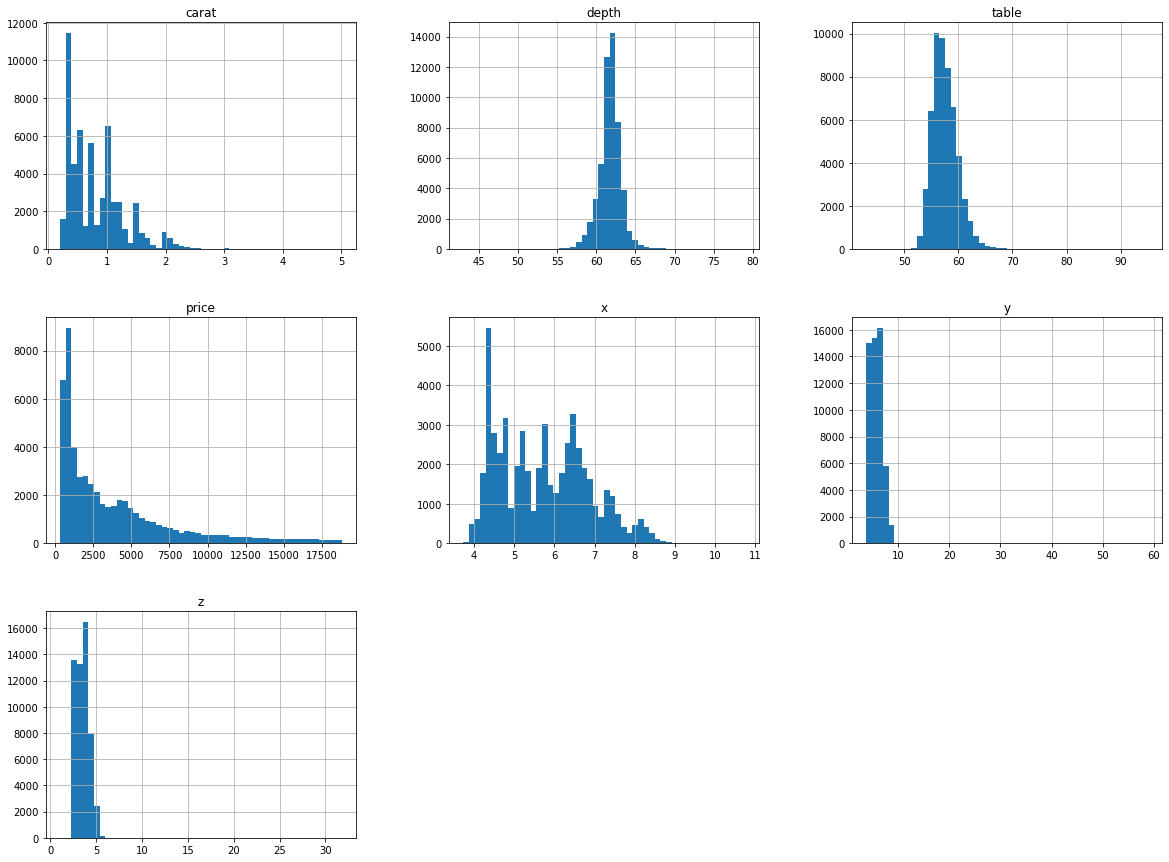

In [61]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

In [64]:
corr_matrix = diamonds.corr() 
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.027889,0.181113,0.921548,0.977857,0.953980,0.961030
depth,0.027889,1.000000,-0.297580,-0.011144,-0.025224,-0.029262,0.094678
table,0.181113,-0.297580,1.000000,0.126666,0.195451,0.183814,0.151683
price,0.921548,-0.011144,0.126666,1.000000,0.887137,0.867685,0.868030
x,0.977857,-0.025224,0.195451,0.887137,1.000000,0.974822,0.975382
y,0.953980,-0.029262,0.183814,0.867685,0.974822,1.000000,0.956623
z,0.961030,0.094678,0.151683,0.868030,0.975382,0.956623,1.000000


<AxesSubplot:>

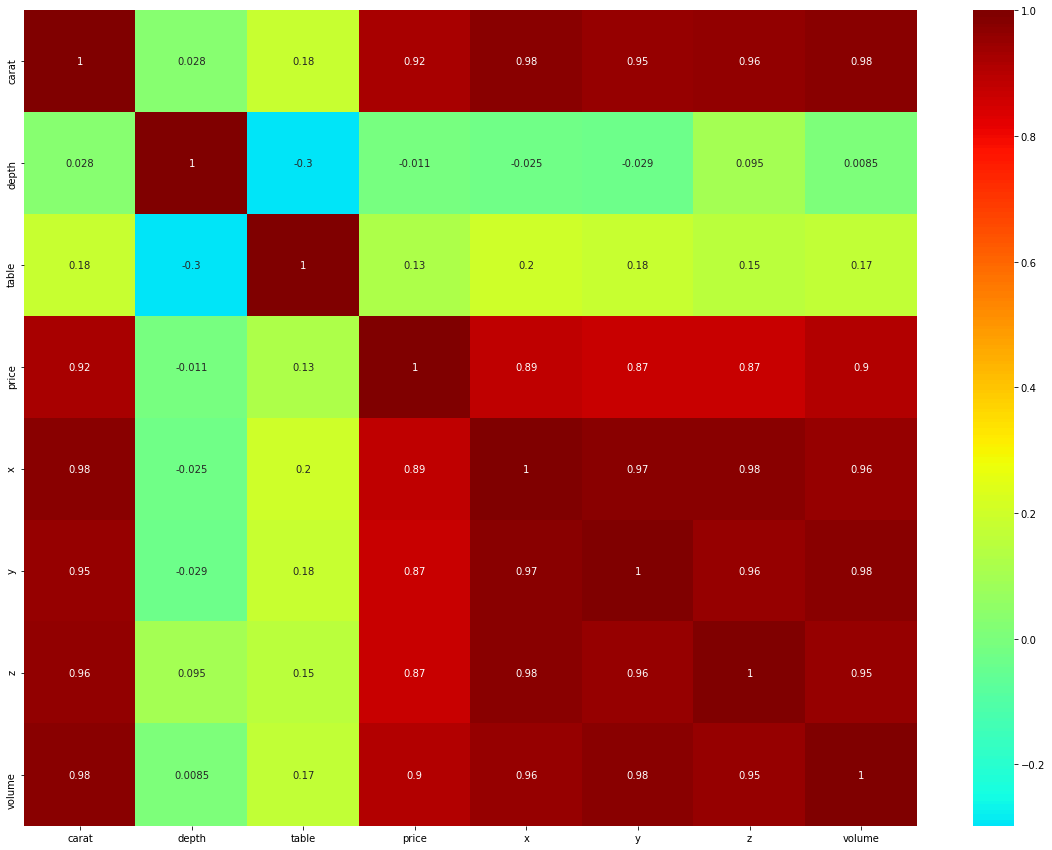

In [66]:
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(diamonds.corr(),cmap="jet",center=0,annot=True)

In [65]:
diamonds["volume"] = diamonds["x"]*diamonds["y"]*diamonds["z"]

In [67]:
diamonds.drop("depth", axis = 1,inplace = True)

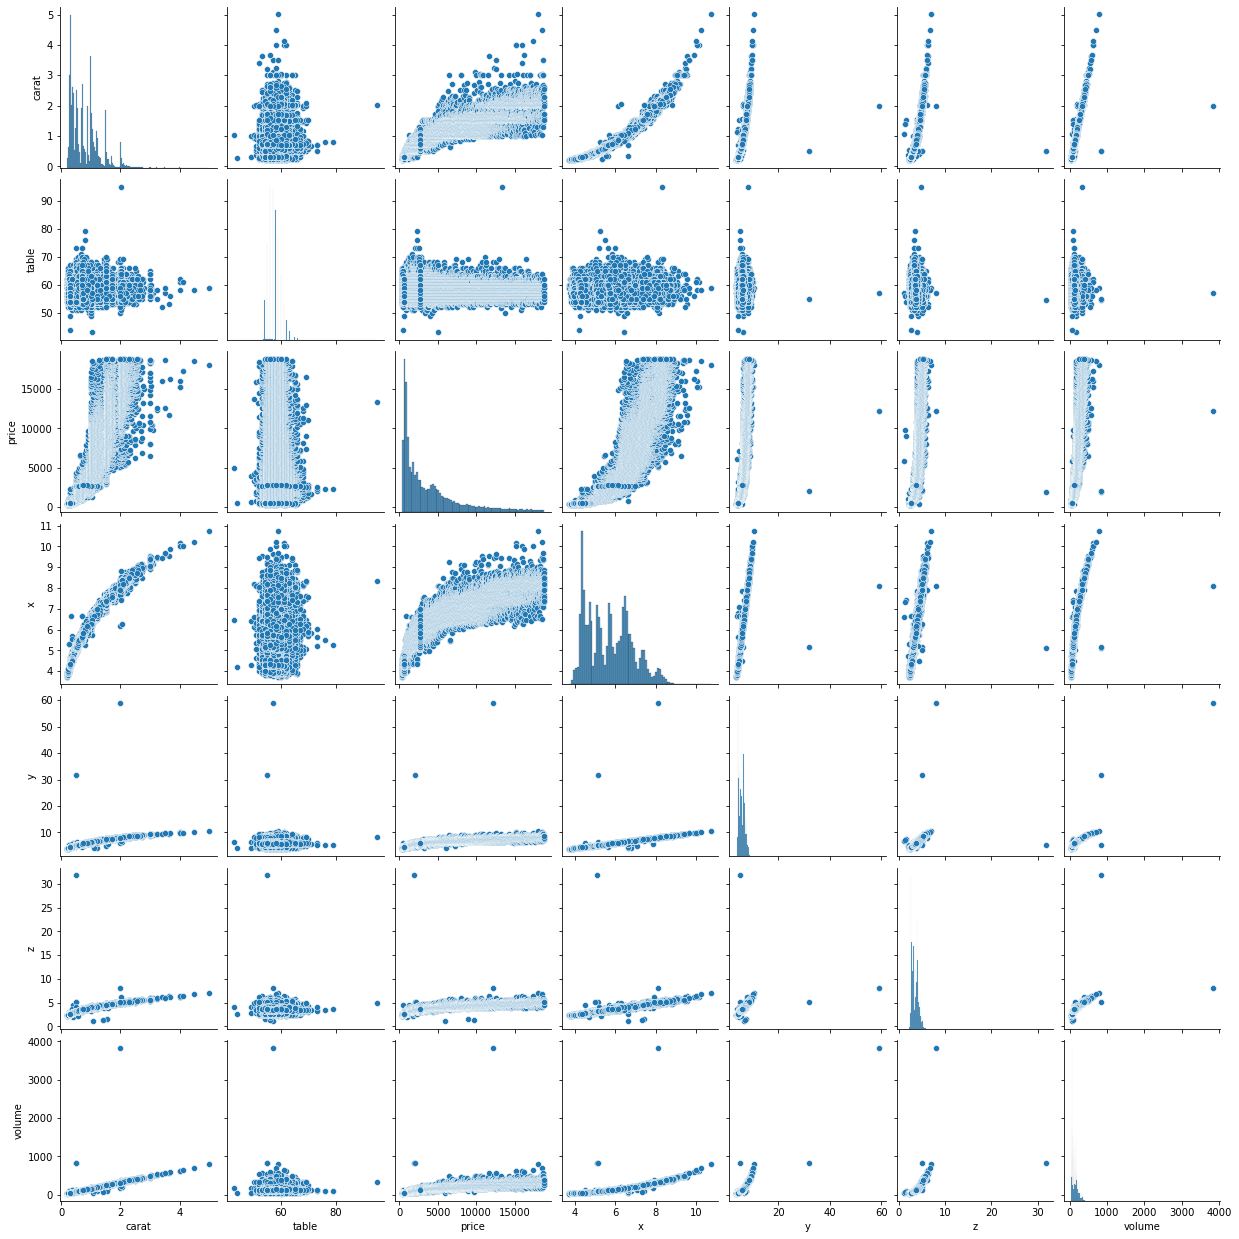

In [68]:
sns.pairplot(diamonds)

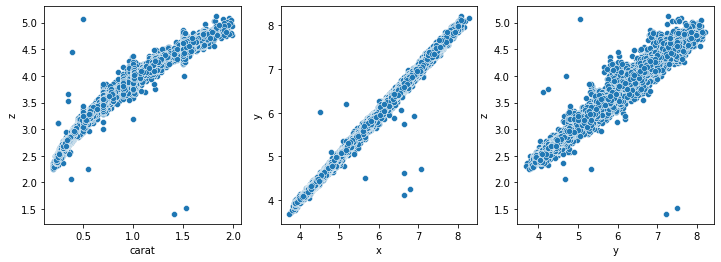

In [103]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
sns.scatterplot(x = diamonds['carat'], y = diamonds['z'], ax = axes[0]) 

sns.scatterplot(x = diamonds['x'], y = diamonds['y'], ax = axes[1])

sns.scatterplot(x = diamonds['y'], y = diamonds['z'], ax = axes[2])

plt.show()

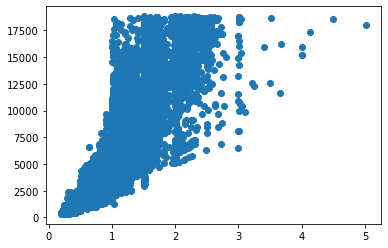

In [63]:
plt.scatter(diamonds["carat"],diamonds["price"])

In [70]:
diamonds.shape

(53775, 10)

In [71]:
diamonds = diamonds[(diamonds["y"]<30)]

In [72]:
diamonds.shape

(53773, 10)

In [73]:
diamonds = diamonds[(diamonds["z"]<30)]

In [74]:
diamonds.shape

(53772, 10)

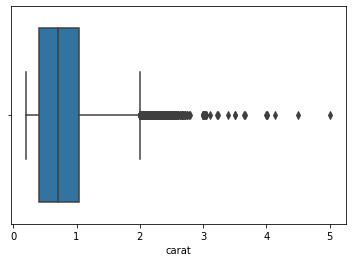

In [75]:
sns.boxplot(x=diamonds["carat"])

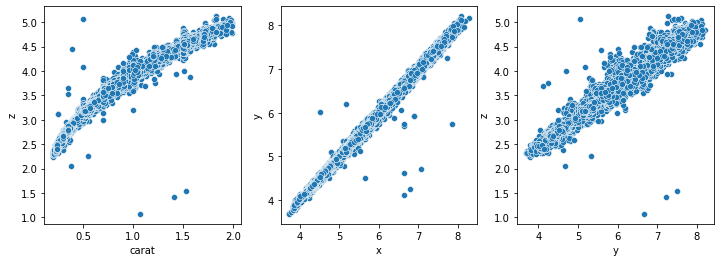

In [84]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
sns.scatterplot(x = diamonds['carat'], y = diamonds['z'], ax = axes[0]) 

sns.scatterplot(x = diamonds['x'], y = diamonds['y'], ax = axes[1])

sns.scatterplot(x = diamonds['y'], y = diamonds['z'], ax = axes[2])
plt.show()

In [76]:
diamonds.shape

(53772, 10)

In [77]:
diamonds = diamonds[(diamonds["carat"]<2)]

In [78]:
diamonds.shape

(51643, 10)

<AxesSubplot:xlabel='carat'>

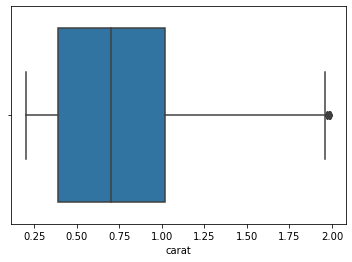

In [79]:
sns.boxplot(x=diamonds["carat"])

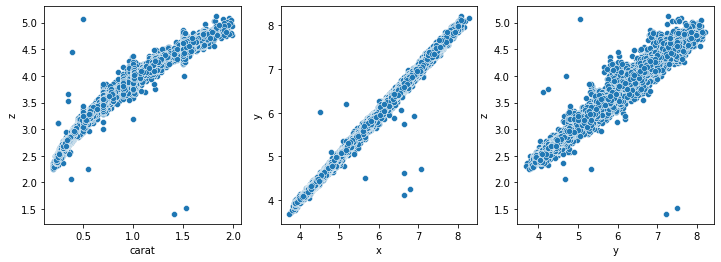

In [104]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
sns.scatterplot(x = diamonds['carat'], y = diamonds['z'], ax = axes[0]) 

sns.scatterplot(x = diamonds['x'], y = diamonds['y'], ax = axes[1])

sns.scatterplot(x = diamonds['y'], y = diamonds['z'], ax = axes[2])
plt.show()

In [85]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

In [86]:
corr_matrix = diamonds.corr()
corr_matrix["price"].sort_values(ascending=False)

price     1.000000
volume    0.904504
carat     0.902230
y         0.871014
x         0.869036
z         0.863758
table     0.105393
Name: price, dtype: float64

In [87]:
diamonds.shape

(51643, 10)

In [88]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)

In [92]:
print(train_set.shape)
print(test_set.shape)

(41314, 10)
(10329, 10)


In [89]:
diamonds = train_set.drop("price", axis=1)
diamonds_labels = train_set["price"].copy()

In [91]:
print(diamonds.shape)
print(diamonds_labels.shape)

(41314, 9)
(41314,)


In [93]:
print(diamonds["clarity"].unique())
print(diamonds["color"].unique())
print(diamonds["cut"].unique())

['SI2' 'SI1' 'VS1' 'VVS2' 'VS2' 'IF' 'VVS1' 'I1']
['F' 'H' 'D' 'E' 'I' 'G' 'J']
['Very Good' 'Premium' 'Ideal' 'Good' 'Fair']


In [94]:
diamonds_num = diamonds.drop(["clarity", "color","cut"], axis=1)
num_attribs = list(diamonds_num)
cat_attribs = ["clarity", "color","cut"]

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [96]:
print(diamonds[:5])

       carat        cut color clarity  table     x     y     z      volume
7043    1.02  Very Good     F     SI2   59.0  6.33  6.42  3.95  160.522470
32969   0.32  Very Good     H     SI1   55.0  4.37  4.38  2.74   52.445244
7394    0.33    Premium     H     VS1   59.0  4.48  4.53  2.68   54.388992
13103   1.10      Ideal     H     SI1   55.0  6.68  6.70  4.11  183.947160
24145   1.16      Ideal     D    VVS2   55.0  6.72  6.76  4.17  189.431424


In [97]:
diamonds.shape

(41314, 9)

In [98]:
num_pipeline = Pipeline([
 ('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs)])

diamonds_prepared = full_pipeline.fit_transform(diamonds)

In [99]:
print(diamonds_prepared[:5])

[[ 0.70304316  0.71214729  0.68865739  0.77917235  0.75356091  0.62040778
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]
 [-1.07596435 -1.09255763 -1.24134715 -1.24265028 -1.17480355 -1.07924732
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          1.        ]
 [-1.05054995  0.71214729 -1.13303057 -1.09398685 -1.27042493 -1.04867935
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   1.          0.        ]
 [ 0.90635831 -1.09255763  1.03330106  1.05667742  1.00855125  0.98879154
   0.          0.          1.

In [100]:
pd.DataFrame(diamonds_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.703043,0.712147,0.688657,0.779172,0.753561,0.620408,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.075964,-1.092558,-1.241347,-1.242650,-1.174804,-1.079247,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.050550,0.712147,-1.133031,-1.093987,-1.270425,-1.048679,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.906358,-1.092558,1.033301,1.056677,1.008551,0.988792,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.058845,-1.092558,1.072689,1.116143,1.104173,1.075039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
diamonds_prepared.shape

(41314, 26)

# ## 1- Select and Train a Model

# Let’s first train a LinearRegression model 

In [160]:
diamonds_prepared.shape

(41314, 26)

In [161]:
diamonds_labels.shape

(41314,)

In [162]:
diamonds.shape

(41314, 9)

In [163]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)

LinearRegression()

# First try it out on a few instances from the training set:


In [164]:
some_data =diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]

In [165]:
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [4510.70523388 -593.2017286   344.96636744 5890.63934995 8629.21166599]


In [166]:
print("Labels:", list(some_labels))

Labels: [4162, 461, 579, 5424, 12314]


# measure this regression model’s RMSE on the whole training set 

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_mse = mean_squared_error(diamonds_labels,diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

969.3754412774642

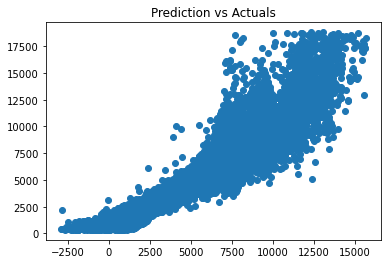

In [169]:
#Examine results of prediction vs the actual price. A perfect linear line 
plt.scatter(diamonds_predictions,diamonds_labels)
plt.title('Prediction vs Actuals')
plt.show()

# Let’s train a Decision Tree Regressor model 
## more powerful model

In [170]:
from sklearn.tree import DecisionTreeRegressor 

In [171]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamonds_prepared, diamonds_labels)

DecisionTreeRegressor()

# Now evaluate the model on the training set 

In [172]:
diamonds_predictions = tree_reg.predict(diamonds_prepared)
tree_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.500261408040603

# Evaluation Using Cross-Validation

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels,
scoring="neg_mean_squared_error", cv=15)
tree_rmse_scores = np.sqrt(-scores)

In [175]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [176]:
display_scores(tree_rmse_scores)

Scores: [591.30977208 596.79117772 539.86970919 593.0767865  596.53703505
 571.19969637 610.38901292 628.50008832 607.05578592 603.59738276
 600.02861595 579.67822434 605.32218287 597.56946342 580.8677756 ]
Mean: 593.4528472674554
Standard deviation: 19.56873914636777


In [177]:
lin_scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels,
 scoring="neg_mean_squared_error", cv=15)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [ 929.50947146  963.68263541  956.89206957  974.11061028  954.70811728
 1009.49948994  948.58327958  980.88621335  991.40664627 1002.81718043
  961.83875075  991.51221881  973.60242824  977.72083727  936.24358551]
Mean: 970.2009022762969
Standard deviation: 22.383649069916785


## Let’s train one last model the RandomForestRegressor.

In [178]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(diamonds_prepared, diamonds_labels)

RandomForestRegressor()

In [179]:
forest_scores= cross_val_score(forest_reg, diamonds_prepared, diamonds_labels,
 scoring="neg_mean_squared_error", cv=15)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [437.10950376 451.27197884 407.70718374 413.48671859 429.70320527
 471.40415017 393.67030975 462.205333   435.33069678 435.69068755
 445.53822116 430.3540676  429.24027559 456.33181633 449.9821579 ]
Mean: 436.60175373492046
Standard deviation: 20.142765232426058


# Fine-Tune Your Model

## 1- Grid Search
## evaluate all the possible combinations of hyperparameter values for the RandomForestRegressor

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
param_grid = [
 {'n_estimators': [3, 10, 30,50,100,300], 'max_features': [2, 4, 6, 8,10,12,16]},
 {'bootstrap': [False], 'n_estimators': [3, 10,30], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
 scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(diamonds_prepared, diamonds_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12, 16],
                          'n_estimators': [3, 10, 30, 50, 100, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [182]:
grid_search.best_params_

{'max_features': 16, 'n_estimators': 300}

In [183]:
grid_search.best_estimator_

RandomForestRegressor(max_features=16, n_estimators=300)

In [184]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

691.471496728707 {'max_features': 2, 'n_estimators': 3}
568.6199264105778 {'max_features': 2, 'n_estimators': 10}
531.4623849956193 {'max_features': 2, 'n_estimators': 30}
524.2995708794265 {'max_features': 2, 'n_estimators': 50}
518.8346670335961 {'max_features': 2, 'n_estimators': 100}
514.6687171048923 {'max_features': 2, 'n_estimators': 300}
595.7779026869066 {'max_features': 4, 'n_estimators': 3}
514.4907064160611 {'max_features': 4, 'n_estimators': 10}
485.0082479751573 {'max_features': 4, 'n_estimators': 30}
475.6898139529935 {'max_features': 4, 'n_estimators': 50}
476.3877375683326 {'max_features': 4, 'n_estimators': 100}
470.8072003245307 {'max_features': 4, 'n_estimators': 300}
565.7583994858143 {'max_features': 6, 'n_estimators': 3}
482.6831732192843 {'max_features': 6, 'n_estimators': 10}
459.4935148078146 {'max_features': 6, 'n_estimators': 30}
454.48822727397123 {'max_features': 6, 'n_estimators': 50}
449.0430659225973 {'max_features': 6, 'n_estimators': 100}
447.72082005

# Analyze the Best Models and Their Errors
1-indicate the relative importance of each attribute

In [185]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.09898922e-01, 2.07202497e-03, 4.35360246e-02, 1.60665644e-01,
       1.07093661e-02, 2.40697753e-01, 1.37398698e-02, 5.21432596e-03,
       1.67025235e-02, 2.70072995e-02, 4.22088512e-03, 5.40969899e-03,
       4.85517713e-03, 7.95361400e-03, 4.20868725e-03, 2.26839647e-03,
       2.21325069e-03, 3.53837857e-03, 8.15213761e-03, 1.05593969e-02,
       1.40012787e-02, 2.94925337e-04, 2.12339850e-04, 1.20205410e-03,
       3.52806557e-04, 3.13219133e-04])

## Now is the time to evaluate the final model on the test set.
# Evaluate Your System on the Test Set

In [186]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

In [187]:
X_test_prepared = full_pipeline.transform(X_test)

In [188]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [189]:
final_rmse

430.011572190084